In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [40]:
#Handle Missing Values
df.fillna(df.select_dtypes(include='number').median(), inplace=True)

#Encoding Categorical Variables (if any)
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

Model Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1539
           1       0.49      0.49      0.49       574

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113



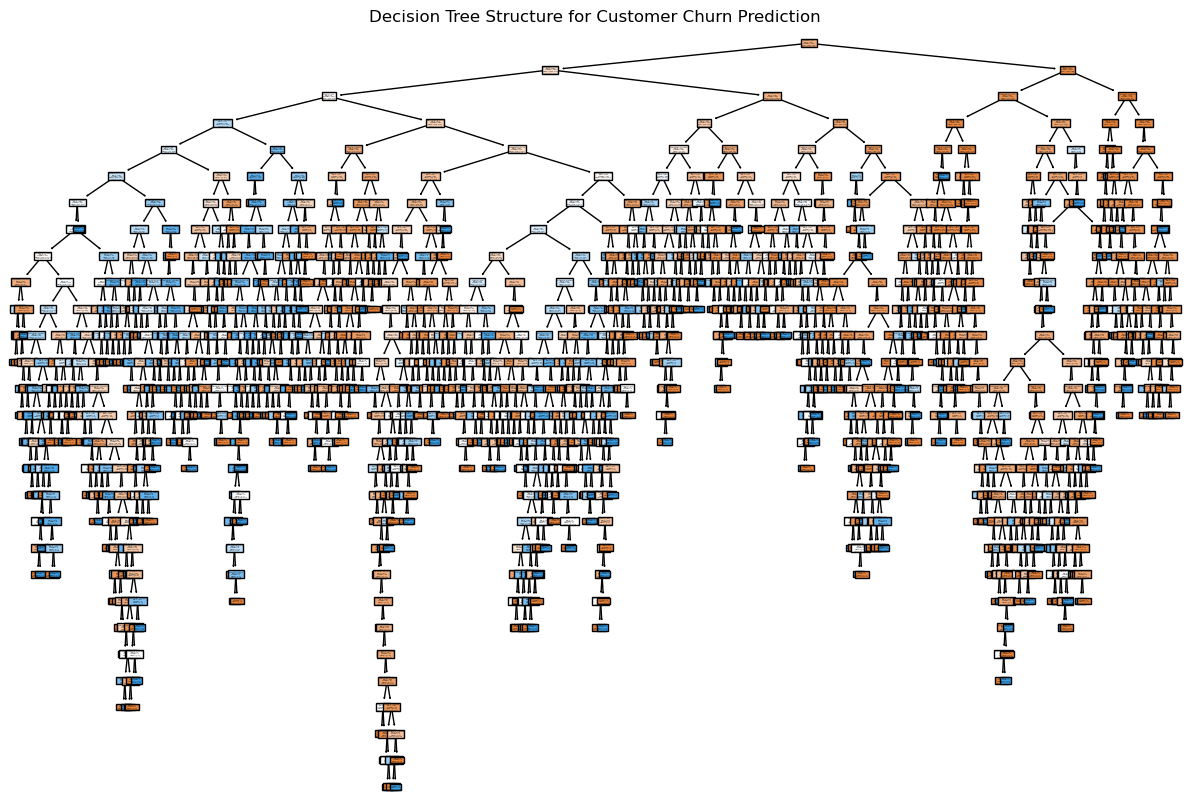

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('modified_telco_churn.csv')


# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoders for potential future inverse transformations

# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.title("Decision Tree Structure for Customer Churn Prediction")
plt.savefig('tree_chart.png')
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Initialize Decision Tree with class weights
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred))



Optimized Model Accuracy: 0.73

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1539
           1       0.50      0.49      0.49       574

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

